In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_score
import joblib
import os
from sklearn.metrics import roc_curve, roc_auc_score


### Importar el dataset

In [2]:
data = pd.read_csv(r"C:\Users\Dell\TIC\Data-Original\dataset_ransomware_vs_benigno.csv",low_memory=False)

### Informacion de la data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   md5                         15638 non-null  object 
 1   sha1                        15638 non-null  object 
 2   file_extension              15638 non-null  object 
 3   EntryPoint                  15638 non-null  object 
 4   PEType                      15638 non-null  object 
 5   MachineType                 15638 non-null  object 
 6   magic_number                15638 non-null  object 
 7   bytes_on_last_page          15638 non-null  object 
 8   pages_in_file               15638 non-null  object 
 9   relocations                 15638 non-null  object 
 10  size_of_header              15638 non-null  object 
 11  min_extra_paragraphs        15638 non-null  object 
 12  max_extra_paragraphs        15638 non-null  object 
 13  init_ss_value               156

In [4]:
data.describe()

,registry_read,registry_write,registry_delete,registry_total,network_threats,network_dns,network_http,network_connections,processes_malicious,processes_suspicious,processes_monitored,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis
count,1.563800e+04,15638.000000,15638.000000,1.563800e+04,15638.0,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000
mean,1.927277e+03,16.633137,3.706676,1.995917e+03,0.0,5.245300,0.955109,25.675470,1.018609,0.276826,7.629620,41.294539,9.534851,492.771070,97.075010,39.684359,4.928060,96.432280
std,2.662561e+04,119.403903,47.972870,2.667034e+04,0.0,46.171852,13.271614,221.332904,2.543949,1.278024,30.711822,45.347343,51.024848,2302.971937,435.151715,265.315908,6.203546,171.621346
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.100000e+01,0.000000,0.000000,6.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.200000e+02,0.000000,0.000000,1.050000e+02,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,37.000000,0.000000,0.000000,0.000000,0.000000,3.000000,31.000000
75%,8.117500e+02,1.000000,0.000000,7.640000e+02,0.0,0.000000,0.000000,5.000000,1.000000,0.000000,5.000000,44.000000,0.000000,39.000000,4.000000,2.000000,8.000000,116.000000
max,1.785397e+06,4046.000000,2101.000000,1.785649e+06,0.0,1339.000000,1186.000000,11232.000000,75.000000,43.000000,1619.000000,2167.000000,1104.000000,63152.000000,9951.000000,14075.000000,134.000000,3575.000000


### Numero de columnas y filas

In [5]:
print("Shape", data.shape)
print("Filas", data.shape[0])
print("Columnas", data.shape[1])

Shape (15638, 77)
Filas 15638
Columnas 77


### Listar todas las columnas por tipo de varibale: categorica y numerica

In [6]:
# --- Detectar columnas categóricas ---
cat_cols = data.select_dtypes(include=["object"]).columns.tolist()

print("Columnas categóricas:")
print(cat_cols)

Columnas categóricas:
['md5', 'sha1', 'file_extension', 'EntryPoint', 'PEType', 'MachineType', 'magic_number', 'bytes_on_last_page', 'pages_in_file', 'relocations', 'size_of_header', 'min_extra_paragraphs', 'max_extra_paragraphs', 'init_ss_value', 'init_sp_value', 'init_ip_value', 'init_cs_value', 'over_lay_number', 'oem_identifier', 'address_of_ne_header', 'Magic', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'OperatingSystemVersion', 'ImageVersion', 'SizeOfImage', 'SizeOfHeaders', 'Checksum', 'Subsystem', 'DllCharacteristics', 'SizeofStackReserve', 'SizeofStackCommit', 'SizeofHeapCommit', 'SizeofHeapReserve', 'LoaderFlags', 'text_VirtualSize', 'text_VirtualAddress', 'text_SizeOfRawData', 'text_PointerToRawData', 'text_PointerToRelocations', 'text_PointerToLineNumbers', 'text_Characteristics', 'rdata_VirtualSize', 'rdata_VirtualAddress', 'rdata_SizeOfRawData', 'rda

In [7]:
# --- Detectar columnas numericas ---
num_cols = data.select_dtypes(include=["float64"]).columns.tolist()

print("Columnas numericas detectadas:")
print(num_cols )

Columnas numericas detectadas:
['registry_read', 'registry_write', 'registry_delete', 'registry_total', 'network_threats', 'network_dns', 'network_http', 'network_connections', 'processes_malicious', 'processes_suspicious', 'processes_monitored', 'total_procsses', 'files_malicious', 'files_suspicious', 'files_text', 'files_unknown', 'dlls_calls', 'apis']


### Cantidad de  variables numericas y categoricas

In [8]:
data.dtypes.value_counts()


object     59
float64    18
Name: count, dtype: int64

### Revisar la cardinalidad de las variables categoricas

In [9]:
# --- Revisar cardinalidad (número de valores únicos) ---
cat_cardinalidad = {c: data[c].nunique() for c in cat_cols}
print("\nCardinalidad de columnas categóricas:")
for col, nunique in cat_cardinalidad.items():
    print(f"{col}: {nunique}")


Cardinalidad de columnas categóricas:
md5: 8661
sha1: 8662
file_extension: 1
EntryPoint: 5553
PEType: 3
MachineType: 3
magic_number: 1
bytes_on_last_page: 62
pages_in_file: 61
relocations: 42
size_of_header: 42
min_extra_paragraphs: 41
max_extra_paragraphs: 39
init_ss_value: 39
init_sp_value: 45
init_ip_value: 51
init_cs_value: 50
over_lay_number: 47
oem_identifier: 46
address_of_ne_header: 53
Magic: 2
SizeOfCode: 2387
SizeOfInitializedData: 2118
SizeOfUninitializedData: 396
AddressOfEntryPoint: 5492
BaseOfCode: 332
BaseOfData: 919
ImageBase: 93
SectionAlignment: 8
FileAlignment: 7
OperatingSystemVersion: 19
ImageVersion: 90
SizeOfImage: 1902
SizeOfHeaders: 23
Checksum: 3075
Subsystem: 4
DllCharacteristics: 49
SizeofStackReserve: 56
SizeofStackCommit: 41
SizeofHeapCommit: 9
SizeofHeapReserve: 21
LoaderFlags: 4
text_VirtualSize: 5013
text_VirtualAddress: 120
text_SizeOfRawData: 2041
text_PointerToRawData: 121
text_PointerToRelocations: 6
text_PointerToLineNumbers: 12
text_Characteristi

### Ver los valores nulos

In [10]:
print("\n Conteo de valores nulos por columna:")
print(data.isnull().sum())


 Conteo de valores nulos por columna:
md5               0
sha1              0
file_extension    0
EntryPoint        0
PEType            0
                 ..
dlls_calls        0
apis              0
Class             0
Category          0
Family            0
Length: 77, dtype: int64


### Valores vacios por columna

In [11]:
# Detectar valores vacíos 
print("\n Conteo de valores vacíos por columna:")
print((data.applymap(lambda x: str(x).strip() == '')).sum())




 Conteo de valores vacíos por columna:


C:\Users\Dell\AppData\Local\Temp\ipykernel_40836\2066599476.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print((data.applymap(lambda x: str(x).strip() == '')).sum())


md5               0
sha1              0
file_extension    0
EntryPoint        0
PEType            0
                 ..
dlls_calls        0
apis              0
Class             0
Category          0
Family            0
Length: 77, dtype: int64


### Ver  filas vacias

In [12]:
#  Detectar filas completamente vacías
print("\n Número de filas completamente vacías:")
print(data.isnull().all(axis=1).sum())


 Número de filas completamente vacías:
0


In [13]:
# 6) Ver filas sospechosas (con valores nulos o vacíos en alguna columna)
print("\n Filas con valores nulos o vacíos:")
print(data[data.isnull().any(axis=1) | data.applymap(lambda x: str(x).strip() == '').any(axis=1)])


 Filas con valores nulos o vacíos:


C:\Users\Dell\AppData\Local\Temp\ipykernel_40836\3230463956.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(data[data.isnull().any(axis=1) | data.applymap(lambda x: str(x).strip() == '').any(axis=1)])


Empty DataFrame
Columns: [md5, sha1, file_extension, EntryPoint, PEType, MachineType, magic_number, bytes_on_last_page, pages_in_file, relocations, size_of_header, min_extra_paragraphs, max_extra_paragraphs, init_ss_value, init_sp_value, init_ip_value, init_cs_value, over_lay_number, oem_identifier, address_of_ne_header, Magic, SizeOfCode, SizeOfInitializedData, SizeOfUninitializedData, AddressOfEntryPoint, BaseOfCode, BaseOfData, ImageBase, SectionAlignment, FileAlignment, OperatingSystemVersion, ImageVersion, SizeOfImage, SizeOfHeaders, Checksum, Subsystem, DllCharacteristics, SizeofStackReserve, SizeofStackCommit, SizeofHeapCommit, SizeofHeapReserve, LoaderFlags, text_VirtualSize, text_VirtualAddress, text_SizeOfRawData, text_PointerToRawData, text_PointerToRelocations, text_PointerToLineNumbers, text_Characteristics, rdata_VirtualSize, rdata_VirtualAddress, rdata_SizeOfRawData, rdata_PointerToRawData, rdata_PointerToRelocations, rdata_PointerToLineNumbers, rdata_Characteristics, re

### Distribucion de la clase Bening y Ransoware
Las clases estan desbalanceadas

Distribución de clases:
 Category
Benign        10876
Ransomware     4762
Name: count, dtype: int64

Total de muestras en el dataset: 15638


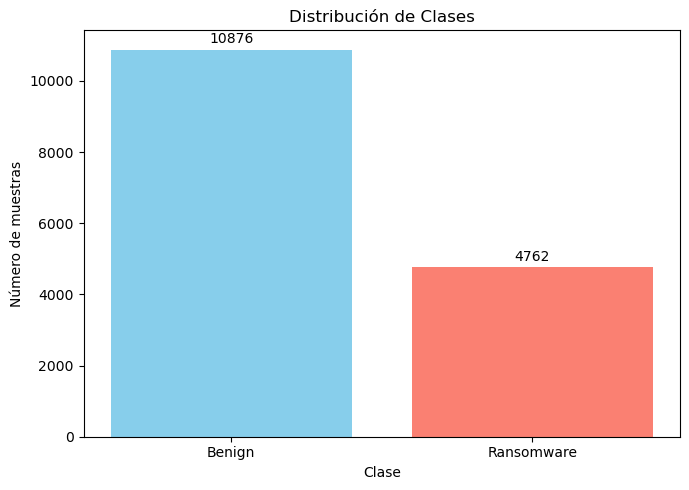

In [14]:
# Contar muestras por categoría
class_counts = data["Category"].value_counts()

# Calcular total general
total_samples = class_counts.sum()

# Imprimir valores exactos
print("Distribución de clases:\n", class_counts)
print(f"\nTotal de muestras en el dataset: {total_samples}")

# Graficar
plt.figure(figsize=(7,5))
bars = plt.bar(class_counts.index, class_counts.values, 
               color=["skyblue", "salmon", "orange"])

# Título  general
plt.title(f"Distribución de Clases")

# Etiquetas de ejes
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.xticks(rotation=0)

# Mostrar valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Definir features (X)
Ahora X contiene solo las características.

In [15]:
X = data.drop(columns=["Class", "Category", "Family"], errors="ignore")
print("Shape de X (features):", X.shape)

Shape de X (features): (15638, 74)


### Definir target

In [16]:
y = data["Category"] # multiclase: Benign, Ransomware
print("Shape de y (target):", y.shape)

Shape de y (target): (15638,)


### Eliminacion de columnas que no aportan valor

In [17]:
cols_drop = [
    "md5", "sha1", "file_extension", "network_threats", "Magic", "magic_number",
    "oem_identifier", "address_of_ne_header",
    "text_PointerToRelocations", "text_PointerToLineNumbers",
    "rdata_PointerToRelocations", "rdata_PointerToLineNumbers",
    "Class", "Category", "Family", "registry_total", "total_procsses",
    "OperatingSystemVersion", "ImageVersion",
    "files_malicious", "files_suspicious", "files_text", "files_unknown",
    "processes_malicious", "processes_suspicious", "processes_monitored"
]

X = X.drop(columns=cols_drop, errors="ignore")
print("Shape de X después de eliminar columnas no útiles:", X.shape)


Shape de X después de eliminar columnas no útiles: (15638, 51)


### Dataset limpio

In [18]:
print("Shape del dataset limpio:", X.shape)
print("Columnas:", X.columns.tolist())


Shape del dataset limpio: (15638, 51)
Columnas: ['EntryPoint', 'PEType', 'MachineType', 'bytes_on_last_page', 'pages_in_file', 'relocations', 'size_of_header', 'min_extra_paragraphs', 'max_extra_paragraphs', 'init_ss_value', 'init_sp_value', 'init_ip_value', 'init_cs_value', 'over_lay_number', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'SizeOfImage', 'SizeOfHeaders', 'Checksum', 'Subsystem', 'DllCharacteristics', 'SizeofStackReserve', 'SizeofStackCommit', 'SizeofHeapCommit', 'SizeofHeapReserve', 'LoaderFlags', 'text_VirtualSize', 'text_VirtualAddress', 'text_SizeOfRawData', 'text_PointerToRawData', 'text_Characteristics', 'rdata_VirtualSize', 'rdata_VirtualAddress', 'rdata_SizeOfRawData', 'rdata_PointerToRawData', 'rdata_Characteristics', 'registry_read', 'registry_write', 'registry_delete', 'network_dns', 'network_http', 'network_connections', 'dlls_calls', 'apis

### Renombrar variables 

In [19]:
# Mapeo de nombres largos a cortos
rename_map = {
    "Intel 386 or later, and compatibles": "Intel386",
    "AMD AMD64": "AMD64",
    "MachineType": "Unknown"  # por si aparece un valor raro como 'MachineType'
}

# Aplicar reemplazo en la columna MachineType
if "MachineType" in X.columns:
    X["MachineType"] = X["MachineType"].replace(rename_map)

print("Valores únicos después del renombrado:")
print(X["MachineType"].unique())



Valores únicos después del renombrado:
['AMD64' 'Intel386' 'Unknown (0)']


In [20]:
# Conteo de nulos por columna
print(X.isnull().sum()[X.isnull().sum() > 0])

Series([], dtype: int64)


In [21]:
# Reemplazar '0' por IMAGE_SUBSYSTEM_UNKNOWN
if "Subsystem" in X.columns:
    X["Subsystem"] = X["Subsystem"].replace("0", "IMAGE_SUBSYSTEM_UNKNOWN")

print("Categorías únicas después:", X["Subsystem"].unique())
print("Conteo actualizado:")
print(X["Subsystem"].value_counts())




Categorías únicas después: ['IMAGE_SUBSYSTEM_WINDOWS_GUI' 'IMAGE_SUBSYSTEM_WINDOWS_CUI'
 'IMAGE_SUBSYSTEM_NATIVE' 'IMAGE_SUBSYSTEM_UNKNOWN']
Conteo actualizado:
Subsystem
IMAGE_SUBSYSTEM_WINDOWS_GUI    12061
IMAGE_SUBSYSTEM_WINDOWS_CUI     3483
IMAGE_SUBSYSTEM_NATIVE            90
IMAGE_SUBSYSTEM_UNKNOWN            4
Name: count, dtype: int64


### Verificar las variables con error

In [22]:
# Ver todas las filas que tienen ese valor
X[X["PEType"] == "Unknown (0x2000)"]


,EntryPoint,PEType,MachineType,bytes_on_last_page,pages_in_file,relocations,size_of_header,min_extra_paragraphs,max_extra_paragraphs,init_ss_value,...,rdata_PointerToRawData,rdata_Characteristics,registry_read,registry_write,registry_delete,network_dns,network_http,network_connections,dlls_calls,apis
999,0x0000,Unknown (0x2000),Intel386,0x0050,0x0002,0x0000,0x0004,0x000F,0xFFFF,0x0000,...,0x00013400,"['IMAGE_SCN_CNT_INITIALIZED_DATA', 'IMAGE_SCN_...",10.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
9655,0x2800a,Unknown (0x2000),Intel386,0x0050,0x0002,0x0000,0x0004,0x0000,0xFFFF,0x0000,...,0x00072200,"['IMAGE_SCN_CNT_INITIALIZED_DATA', 'IMAGE_SCN_...",0.0,0.0,1.0,0.0,0.0,12.0,0.0,338.0


### Eliminar filas que tienen errores

In [23]:
# === Eliminar filas con PEType = 'Unknown (0x2000)' ===
if "PEType" in X.columns:
    filas_iniciales = X.shape[0]
    mask = X["PEType"] != "Unknown (0x2000)"
    X = X[mask]
    y = y[mask]   # eliminar también en y
    print(f"Filas eliminadas (PEType): {filas_iniciales - X.shape[0]}")



Filas eliminadas (PEType): 2


In [24]:
# === Eliminar filas con MachineType = 'Unknown (0)' ===
filas_iniciales = X.shape[0]
if "MachineType" in X.columns:
    mask = X["MachineType"] != "Unknown (0)"
    X = X[mask]
    y = y[mask]   # eliminar también en y

filas_finales = X.shape[0]



In [25]:
print(f"Filas eliminadas (MachineType): {filas_iniciales - filas_finales}")
print(f"Shape final de X: {X.shape}")
print(f"Shape final de y: {y.shape}")
print("Valores únicos en MachineType:", X["MachineType"].unique())

Filas eliminadas (MachineType): 6
Shape final de X: (15630, 51)
Shape final de y: (15630,)
Valores únicos en MachineType: ['AMD64' 'Intel386']


### Limpieza de la variable AddressOfEntryPoint

In [26]:
def limpiar_hex_con_texto(val):
    if isinstance(val, str):
        val = val.strip()
        if val == "0":       # caso especial: valor 0
            return 0.0
        match = re.search(r"0x[0-9A-Fa-f]+", val)
        if match:
            try:
                return float(int(match.group(0), 16))
            except:
                return np.nan
        return np.nan
    return val
if "AddressOfEntryPoint" in X.columns:
    X["AddressOfEntryPoint"] = (
        X["AddressOfEntryPoint"]
        .map(limpiar_hex_con_texto)
        .astype("float64")
    )
    print("Columna AddressOfEntryPoint corregida sin convertir los '0' a NaN.")
    print("Nulos restantes:", X["AddressOfEntryPoint"].isnull().sum())


Columna AddressOfEntryPoint corregida sin convertir los '0' a NaN.
Nulos restantes: 0


In [27]:
# Conteo de nulos por columna
print(X.isnull().sum()[X.isnull().sum() > 0])

Series([], dtype: int64)


### Ver las variables que  tienen formato hexadecimal

In [28]:
HEX_REGEX = re.compile(r"^\s*0[xX][0-9A-Fa-f]+\s*$")

def es_hex(s: str) -> bool:
    return isinstance(s, str) and bool(HEX_REGEX.match(s.strip()))

hex_cols = []   

for col in data.select_dtypes(include=["object"]).columns:
    muestra = data[col].dropna().astype(str)
    if muestra.map(es_hex).any():
        hex_cols.append(col)

hex_cols



['EntryPoint',
 'bytes_on_last_page',
 'pages_in_file',
 'relocations',
 'size_of_header',
 'min_extra_paragraphs',
 'max_extra_paragraphs',
 'init_ss_value',
 'init_sp_value',
 'init_ip_value',
 'init_cs_value',
 'over_lay_number',
 'oem_identifier',
 'address_of_ne_header',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode',
 'BaseOfData',
 'ImageBase',
 'SectionAlignment',
 'FileAlignment',
 'SizeOfImage',
 'SizeOfHeaders',
 'Checksum',
 'SizeofStackReserve',
 'SizeofStackCommit',
 'SizeofHeapCommit',
 'SizeofHeapReserve',
 'LoaderFlags',
 'text_VirtualSize',
 'text_VirtualAddress',
 'text_SizeOfRawData',
 'text_PointerToRawData',
 'text_PointerToRelocations',
 'text_PointerToLineNumbers',
 'rdata_VirtualSize',
 'rdata_VirtualAddress',
 'rdata_SizeOfRawData',
 'rdata_PointerToRawData',
 'rdata_PointerToRelocations',
 'rdata_PointerToLineNumbers']

In [29]:
df_hex = pd.DataFrame({
    "Columna": hex_cols,
    "Tiene_hexadecimal": ["Sí"] * len(hex_cols)
})
df_hex


,Columna,Tiene_hexadecimal
0,EntryPoint,Sí
1,bytes_on_last_page,Sí
2,pages_in_file,Sí
3,relocations,Sí
4,size_of_header,Sí
5,min_extra_paragraphs,Sí
6,max_extra_paragraphs,Sí
7,init_ss_value,Sí
8,init_sp_value,Sí
9,init_ip_value,Sí


### Convertir las variables  hexadecimales a float


In [30]:
# Variables categóricas que no deben tocarse 
CATEGORICAS_EXCLUIR = [
    "MachineType", "Subsystem", "PEType",
    "DllCharacteristics", "text_Characteristics", "rdata_Characteristics"
]
cat_presentes = [c for c in CATEGORICAS_EXCLUIR if c in X.columns]

#  Funciones auxiliares 
HEX_REGEX = re.compile(r"^\s*0[xX][0-9A-Fa-f]+\s*$")

def es_hex(s: str) -> bool:
    return isinstance(s, str) and bool(HEX_REGEX.match(s.strip()))

def parsear_num(val):
    """Convierte hex ('0x...') o decimal en texto a float64. Si falla -> NaN."""
    if isinstance(val, str):
        s = val.strip()
        if es_hex(s):
            try:
                return float(int(s, 16))
            except:
                return np.nan
        try:
            return float(s)
        except:
            return np.nan
    if val is None or (isinstance(val, float) and np.isnan(val)):
        return np.nan
    try:
        return float(val)
    except:
        return np.nan

#  Detectar columnas 'object' con al menos un valor hexadecimal 
hex_cols = []
for col in X.select_dtypes(include=["object"]).columns:
    if col in cat_presentes:
        continue  # excluye categóricas
    muestra = X[col].dropna().astype(str)
    if muestra.map(es_hex).any():
      hex_cols.append(col)
print("Columnas detectadas con valores hexadecimales:", hex_cols)

# Convertir SOLO esas columnas a float64 
for col in hex_cols:
    X[col] = X[col].map(parsear_num).astype("float64")

# (Opcional) Verificación
print(X[hex_cols].dtypes if hex_cols else "No se detectaron columnas hexadecimales.")

#  Exportar a CSV para verificar si no hay errores
output_path = r"C:\Users\Dell\TIC\Dataset-Final\dataset_valoresfloat3.csv"
X.to_csv(output_path, index=False, encoding="utf-8")
print(f"Archivo exportado a: {output_path}")


Columnas detectadas con valores hexadecimales: ['EntryPoint', 'bytes_on_last_page', 'pages_in_file', 'relocations', 'size_of_header', 'min_extra_paragraphs', 'max_extra_paragraphs', 'init_ss_value', 'init_sp_value', 'init_ip_value', 'init_cs_value', 'over_lay_number', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'SizeOfImage', 'SizeOfHeaders', 'Checksum', 'SizeofStackReserve', 'SizeofStackCommit', 'SizeofHeapCommit', 'SizeofHeapReserve', 'LoaderFlags', 'text_VirtualSize', 'text_VirtualAddress', 'text_SizeOfRawData', 'text_PointerToRawData', 'rdata_VirtualSize', 'rdata_VirtualAddress', 'rdata_SizeOfRawData', 'rdata_PointerToRawData']
EntryPoint                 float64
bytes_on_last_page         float64
pages_in_file              float64
relocations                float64
size_of_header             float64
min_extra_paragraphs       float64
max_extra_paragraphs       float64
init_ss_value  

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15630 entries, 0 to 15637
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EntryPoint               15630 non-null  float64
 1   PEType                   15630 non-null  object 
 2   MachineType              15630 non-null  object 
 3   bytes_on_last_page       15630 non-null  float64
 4   pages_in_file            15630 non-null  float64
 5   relocations              15630 non-null  float64
 6   size_of_header           15630 non-null  float64
 7   min_extra_paragraphs     15630 non-null  float64
 8   max_extra_paragraphs     15630 non-null  float64
 9   init_ss_value            15630 non-null  float64
 10  init_sp_value            15630 non-null  float64
 11  init_ip_value            15630 non-null  float64
 12  init_cs_value            15630 non-null  float64
 13  over_lay_number          15630 non-null  float64
 14  SizeOfCode               15

### Convertir las variables categoricas
Hay 6 variables categoricas
-One-Hot Encoding a MachineType, Subsystem, PEType.
 -Multi-Label Binarization a DllCharacteristics, text_Characteristics, rdata_Characteristics.

In [32]:

# One-Hot Encoding
categorical_single = ["MachineType",  "Subsystem",  "PEType"] 
# Multi-Label Binarization
categorical_multi  = ["DllCharacteristics", "text_Characteristics",
                      "rdata_Characteristics"]  

#  Categorías simples (One-Hot) 
for col in categorical_single:
    if col in X.columns:
        print(f"\n▶ {col} (categorías únicas):")
        print(X[col].unique())

#  Categorías multilabel 
for col in categorical_multi:
    if col in X.columns:
        print(f"\n▶ {col} (categorías posibles):")
        categorias = set()
        for row in X[col].dropna():
            if isinstance(row, str):
                try:
                    # Convierte el string de lista a lista real
                    items = ast.literal_eval(row)
                    categorias.update(items)
                except:
                    pass
        print(sorted(categorias))
        print(f"Total categorías en {col}: {len(categorias)}")



▶ MachineType (categorías únicas):
['AMD64' 'Intel386']

▶ Subsystem (categorías únicas):
['IMAGE_SUBSYSTEM_WINDOWS_GUI' 'IMAGE_SUBSYSTEM_WINDOWS_CUI'
 'IMAGE_SUBSYSTEM_NATIVE' 'IMAGE_SUBSYSTEM_UNKNOWN']

▶ PEType (categorías únicas):
['PE32+' 'PE32']

▶ DllCharacteristics (categorías posibles):
['IMAGE_DLLCHARACTERISTICS_APPCONTAINER', 'IMAGE_DLLCHARACTERISTICS_DYNAMIC_BASE', 'IMAGE_DLLCHARACTERISTICS_FORCE_INTEGRITY', 'IMAGE_DLLCHARACTERISTICS_GUARD_CF', 'IMAGE_DLLCHARACTERISTICS_HIGH_ENTROPY_VA', 'IMAGE_DLLCHARACTERISTICS_NO_BIND', 'IMAGE_DLLCHARACTERISTICS_NO_ISOLATION', 'IMAGE_DLLCHARACTERISTICS_NO_SEH', 'IMAGE_DLLCHARACTERISTICS_NX_COMPAT', 'IMAGE_DLLCHARACTERISTICS_TERMINAL_SERVER_AWARE']
Total categorías en DllCharacteristics: 10

▶ text_Characteristics (categorías posibles):
['IMAGE_SCN_ALIGN_1024BYTES', 'IMAGE_SCN_ALIGN_128BYTES', 'IMAGE_SCN_ALIGN_16BYTES', 'IMAGE_SCN_ALIGN_1BYTES', 'IMAGE_SCN_ALIGN_2048BYTES', 'IMAGE_SCN_ALIGN_256BYTES', 'IMAGE_SCN_ALIGN_2BYTES', 'IMAGE_SCN

### Aplicacion de one Hot Encoder
Variables: MachineType,  Subsystem, PEType

In [33]:

# Variables categóricas de una sola categoría por fila
categorical_single = ["MachineType", "Subsystem", "PEType"]

# Crear el encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Ajustar y transformar sobre X
encoded_array = ohe.fit_transform(X[categorical_single])

# Convertir a DataFrame con nombres de columnas
encoded_df = pd.DataFrame(
    encoded_array, 
    columns=ohe.get_feature_names_out(categorical_single), 
    index=X.index
)

# Concatenar al dataset original, eliminando las columnas viejas
X = pd.concat([X.drop(columns=categorical_single), encoded_df], axis=1)

# optimizar memoria: pasar a uint8 en vez de float64
X[encoded_df.columns] = X[encoded_df.columns].astype("uint8")

# Verificación
print("Shape final de X:", X.shape)
print("Columnas nuevas:", encoded_df.columns.tolist())
print("Categóricas que quedan:", X.select_dtypes(include="object").columns.tolist())



Shape final de X: (15630, 56)
Columnas nuevas: ['MachineType_AMD64', 'MachineType_Intel386', 'Subsystem_IMAGE_SUBSYSTEM_NATIVE', 'Subsystem_IMAGE_SUBSYSTEM_UNKNOWN', 'Subsystem_IMAGE_SUBSYSTEM_WINDOWS_CUI', 'Subsystem_IMAGE_SUBSYSTEM_WINDOWS_GUI', 'PEType_PE32', 'PEType_PE32+']
Categóricas que quedan: ['DllCharacteristics', 'text_Characteristics', 'rdata_Characteristics']


### Variables categoricas en el dataframe

In [34]:
# Obtener columnas generadas por One-Hot
ohe_cols = encoded_df.columns.tolist()

# Mostrar los primeros 10 registros SOLO de las columnas generadas
df_ohe_preview = encoded_df.head(10)

df_ohe_preview


,MachineType_AMD64,MachineType_Intel386,Subsystem_IMAGE_SUBSYSTEM_NATIVE,Subsystem_IMAGE_SUBSYSTEM_UNKNOWN,Subsystem_IMAGE_SUBSYSTEM_WINDOWS_CUI,Subsystem_IMAGE_SUBSYSTEM_WINDOWS_GUI,PEType_PE32,PEType_PE32+
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


### Aplicar Multi-Label Binarization
DllCharacteristics', 'text_Characteristics', 'rdata_Characteristics

In [35]:
multilabel_cols = ["DllCharacteristics", "text_Characteristics", "rdata_Characteristics"]
multilabel_cols = [c for c in multilabel_cols if c in X.columns]

def _to_list(cell):
    """Convierte celda a lista de strings limpia."""
    if isinstance(cell, list):
        return [str(x).strip() for x in cell if str(x).strip() != ""]
    if isinstance(cell, str):
        s = cell.strip()
        if s == "" or s.upper() in {"NAN", "NONE", "NULL"}:
            return []
        # casos como "[]", "['A', 'B']"
        try:
            parsed = ast.literal_eval(s)
            if isinstance(parsed, (list, tuple, set)):
                return [str(x).strip() for x in parsed if str(x).strip() != ""]
            return [s] if s != "" else []
        except Exception:
            return [s]
    # NaN u otros tipos
    return []

nuevas_cols_totales = []

for col in multilabel_cols:
    listas = X[col].apply(_to_list)

    mlb = MultiLabelBinarizer()
    encoded = mlb.fit_transform(listas)

    prefijo = f"{col}_"
    cols_out = [prefijo + cls for cls in mlb.classes_]
    encoded_df = pd.DataFrame(encoded, columns=cols_out, index=X.index)

    # <<< CLAVE: asegurar 0/1 sin vacíos >>>
    encoded_df = encoded_df.fillna(0).astype("uint8")

    # concatenar y eliminar la original
    X = pd.concat([X.drop(columns=[col]), encoded_df], axis=1)
    nuevas_cols_totales.extend(cols_out)

    print(f"{col}: {len(cols_out)} columnas creadas (sin NaN).")

print("\nTotal de columnas nuevas (multilabel):", len(nuevas_cols_totales))
print("Columnas object restantes:", X.select_dtypes(include="object").columns.tolist())


DllCharacteristics: 10 columnas creadas (sin NaN).
text_Characteristics: 31 columnas creadas (sin NaN).
rdata_Characteristics: 37 columnas creadas (sin NaN).

Total de columnas nuevas (multilabel): 78
Columnas object restantes: []


### Visualizacion del Conjunto de datos aplicado multilabel

In [36]:
cols_multilabel = [c for c in nuevas_cols_totales if c in X.columns]
X[cols_multilabel].head(10)



,DllCharacteristics_IMAGE_DLLCHARACTERISTICS_APPCONTAINER,DllCharacteristics_IMAGE_DLLCHARACTERISTICS_DYNAMIC_BASE,DllCharacteristics_IMAGE_DLLCHARACTERISTICS_FORCE_INTEGRITY,DllCharacteristics_IMAGE_DLLCHARACTERISTICS_GUARD_CF,DllCharacteristics_IMAGE_DLLCHARACTERISTICS_HIGH_ENTROPY_VA,DllCharacteristics_IMAGE_DLLCHARACTERISTICS_NO_BIND,DllCharacteristics_IMAGE_DLLCHARACTERISTICS_NO_ISOLATION,DllCharacteristics_IMAGE_DLLCHARACTERISTICS_NO_SEH,DllCharacteristics_IMAGE_DLLCHARACTERISTICS_NX_COMPAT,DllCharacteristics_IMAGE_DLLCHARACTERISTICS_TERMINAL_SERVER_AWARE,...,rdata_Characteristics_IMAGE_SCN_MEM_PURGEABLE,rdata_Characteristics_IMAGE_SCN_MEM_READ,rdata_Characteristics_IMAGE_SCN_MEM_SHARED,rdata_Characteristics_IMAGE_SCN_MEM_WRITE,rdata_Characteristics_IMAGE_SCN_TYPE_COPY,rdata_Characteristics_IMAGE_SCN_TYPE_DSECT,rdata_Characteristics_IMAGE_SCN_TYPE_GROUP,rdata_Characteristics_IMAGE_SCN_TYPE_NOLOAD,rdata_Characteristics_IMAGE_SCN_TYPE_NO_PAD,rdata_Characteristics_IMAGE_SCN_TYPE_OVER
0,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


In [37]:
# Conteo de valores nulos por columna
print(X.isnull().sum())


EntryPoint                                     0
bytes_on_last_page                             0
pages_in_file                                  0
relocations                                    0
size_of_header                                 0
                                              ..
rdata_Characteristics_IMAGE_SCN_TYPE_DSECT     0
rdata_Characteristics_IMAGE_SCN_TYPE_GROUP     0
rdata_Characteristics_IMAGE_SCN_TYPE_NOLOAD    0
rdata_Characteristics_IMAGE_SCN_TYPE_NO_PAD    0
rdata_Characteristics_IMAGE_SCN_TYPE_OVER      0
Length: 131, dtype: int64


In [38]:
print(X.isnull().sum())



EntryPoint                                     0
bytes_on_last_page                             0
pages_in_file                                  0
relocations                                    0
size_of_header                                 0
                                              ..
rdata_Characteristics_IMAGE_SCN_TYPE_DSECT     0
rdata_Characteristics_IMAGE_SCN_TYPE_GROUP     0
rdata_Characteristics_IMAGE_SCN_TYPE_NOLOAD    0
rdata_Characteristics_IMAGE_SCN_TYPE_NO_PAD    0
rdata_Characteristics_IMAGE_SCN_TYPE_OVER      0
Length: 131, dtype: int64


### Seleccion de caracteristicas
Los métodos de selección de características se pueden clasificar en tres categorías generales:

Métodos de filtrado: Los métodos de filtrado utilizan técnicas estadísticas para evaluar la relevancia de las características independientemente del modelo. Entre las técnicas más comunes se incluyen los coeficientes de correlación, las pruebas de chi-cuadrado y la información mutua.

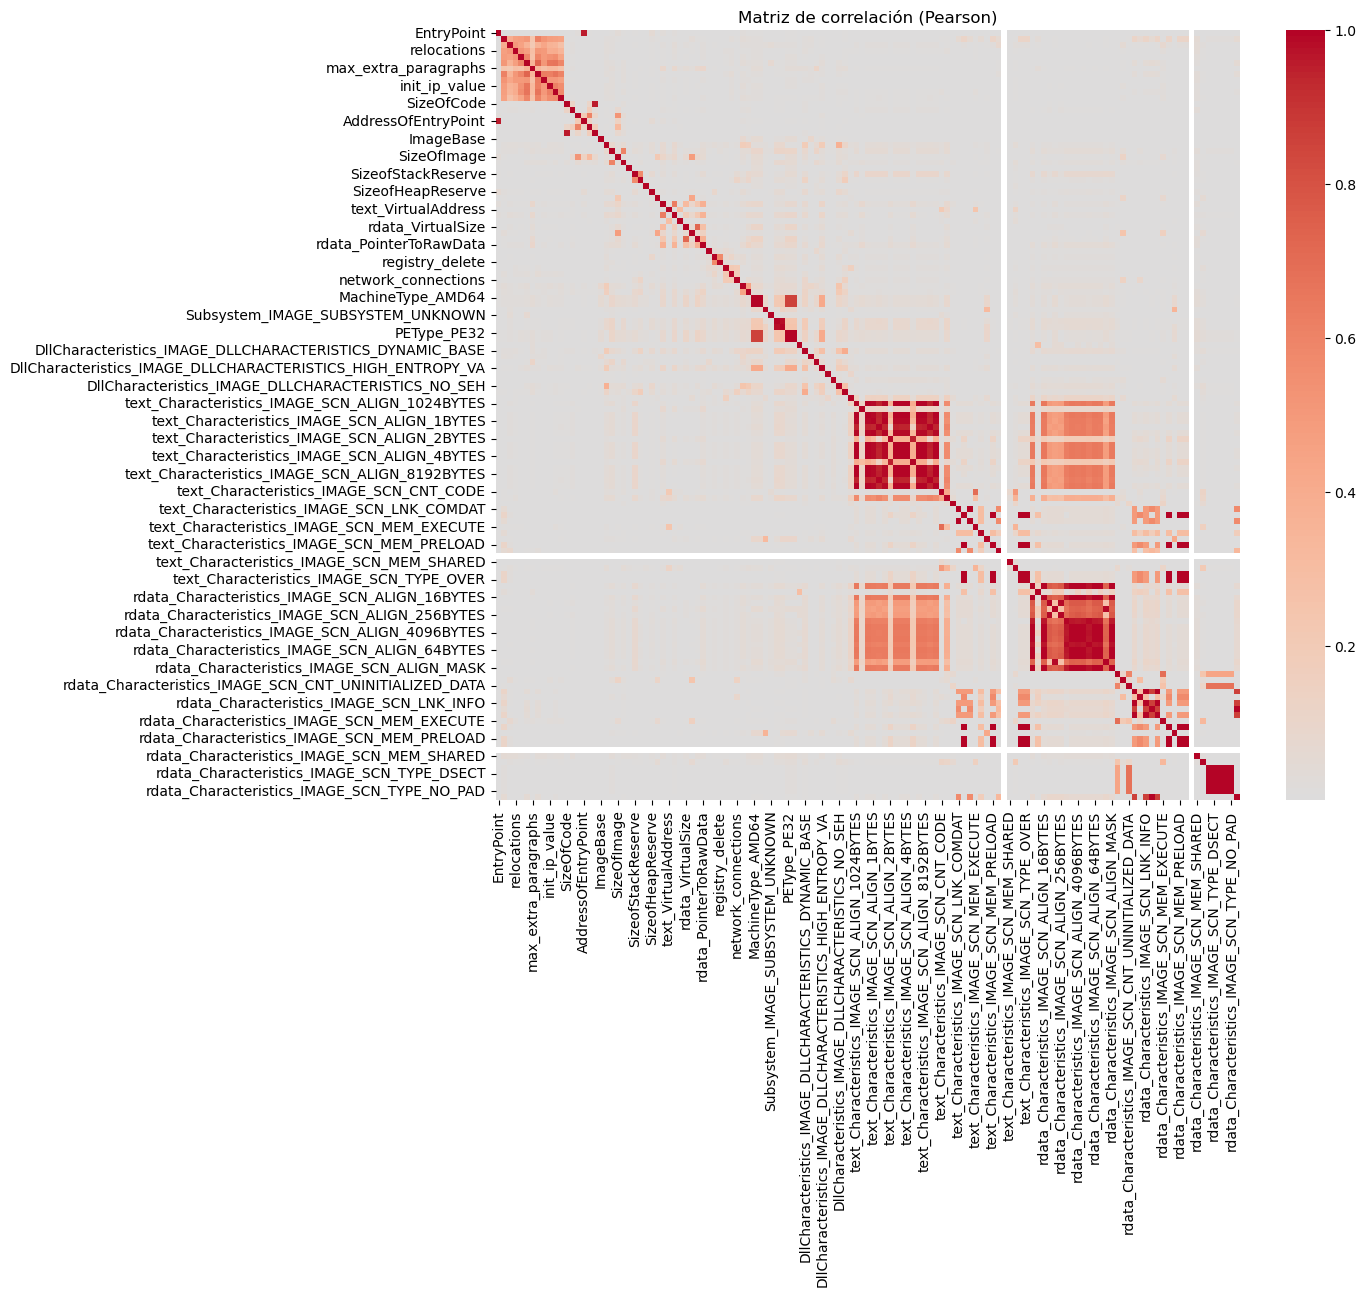

In [39]:
# Calcular matriz de correlación (Pearson) 
corr_matrix = X.corr(method="pearson").abs()

# === 2. Visualización opcional ===
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (Pearson)")
plt.show()

### Detección de variables redundantes

In [40]:

# === 3. Mantener solo parte superior de la matriz (para evitar duplicados)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# === 4. Definir umbral (ejemplo: 0.95)
umbral = 0.95

# === 5. Detectar pares de columnas altamente correlacionadas
correlated_pairs = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if upper.loc[row, col] > umbral
]

# === 6. Mostrar resultados
print(f"Número de pares de columnas con correlación > {umbral}: {len(correlated_pairs)}")
print("Ejemplos de pares correlacionados:")
for pair in correlated_pairs:
    print(pair)




Número de pares de columnas con correlación > 0.95: 134
Ejemplos de pares correlacionados:
('AddressOfEntryPoint', 'EntryPoint', 0.9594616175971374)
('BaseOfData', 'SizeOfCode', 0.954849885829573)
('MachineType_Intel386', 'MachineType_AMD64', 0.9999999999999999)
('Subsystem_IMAGE_SUBSYSTEM_WINDOWS_GUI', 'Subsystem_IMAGE_SUBSYSTEM_WINDOWS_CUI', 0.9833006751052474)
('PEType_PE32+', 'PEType_PE32', 1.0000000000000004)
('text_Characteristics_IMAGE_SCN_ALIGN_16BYTES', 'text_Characteristics_IMAGE_SCN_ALIGN_1024BYTES', 1.0)
('text_Characteristics_IMAGE_SCN_ALIGN_1BYTES', 'text_Characteristics_IMAGE_SCN_ALIGN_1024BYTES', 0.9876131295829854)
('text_Characteristics_IMAGE_SCN_ALIGN_1BYTES', 'text_Characteristics_IMAGE_SCN_ALIGN_16BYTES', 0.9876131295829854)
('text_Characteristics_IMAGE_SCN_ALIGN_256BYTES', 'text_Characteristics_IMAGE_SCN_ALIGN_1024BYTES', 0.9876131295829854)
('text_Characteristics_IMAGE_SCN_ALIGN_256BYTES', 'text_Characteristics_IMAGE_SCN_ALIGN_16BYTES', 0.9876131295829854)
('text

### F-TEST


In [41]:

def calcular_f_test_y_pvalues(X, y, alpha=0.05):
    # Asegurarse de tomar solo variables numéricas
    X_num = X.select_dtypes(include=[np.number])
    
    # Calcular F-test
    F, p = f_classif(X_num, y)
    
    resultados = []
    for feature, f_val, p_val in zip(X_num.columns, F, p):
        if p_val < alpha:
            resultados.append(f"La variable {feature} es linealmente DEPENDIENTE de la clase. p-value: {p_val:.2e}")
        else:
            resultados.append(f"La variable {feature} es linealmente INDEPENDIENTE de la clase. p-value: {p_val:.2e}")
    
    return resultados

# === Ejecución ===
resultados = calcular_f_test_y_pvalues(X, y)

for r in resultados:  
    print(r)


La variable EntryPoint es linealmente DEPENDIENTE de la clase. p-value: 3.62e-03
La variable bytes_on_last_page es linealmente INDEPENDIENTE de la clase. p-value: 2.99e-01
La variable pages_in_file es linealmente DEPENDIENTE de la clase. p-value: 7.94e-06
La variable relocations es linealmente INDEPENDIENTE de la clase. p-value: 5.00e-02
La variable size_of_header es linealmente INDEPENDIENTE de la clase. p-value: 4.30e-01
La variable min_extra_paragraphs es linealmente DEPENDIENTE de la clase. p-value: 1.01e-03
La variable max_extra_paragraphs es linealmente DEPENDIENTE de la clase. p-value: 1.26e-08
La variable init_ss_value es linealmente DEPENDIENTE de la clase. p-value: 7.52e-05
La variable init_sp_value es linealmente INDEPENDIENTE de la clase. p-value: 5.01e-01
La variable init_ip_value es linealmente INDEPENDIENTE de la clase. p-value: 2.67e-01
La variable init_cs_value es linealmente INDEPENDIENTE de la clase. p-value: 1.15e-01
La variable over_lay_number es linealmente INDEPE

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 89 122] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### Mutual Information
Mientras más alto el MI_score, más información aporta la variable para predecir la clase.

In [42]:
# === 1. Calcular Mutual Information ===
mi_scores = mutual_info_classif(X, y, random_state=42)

# === 2. Crear DataFrame con resultados ===
df_mi = pd.DataFrame({
    "Feature": X.columns,
    "MI_score": mi_scores
}).sort_values(by="MI_score", ascending=False)

# === 3. Mostrar TODAS las filas en consola ===
pd.set_option("display.max_rows", None)
print(df_mi)

                                               Feature  MI_score
29                                    text_VirtualSize  0.487442
33                                   rdata_VirtualSize  0.482117
15                                 AddressOfEntryPoint  0.458503
0                                           EntryPoint  0.454898
36                              rdata_PointerToRawData  0.390796
13                               SizeOfInitializedData  0.385899
31                                  text_SizeOfRawData  0.351436
12                                          SizeOfCode  0.326581
21                                         SizeOfImage  0.323201
37                                       registry_read  0.277167
44                                                apis  0.256195
35                                 rdata_SizeOfRawData  0.240497
34                                rdata_VirtualAddress  0.223833
17                                          BaseOfData  0.211687
23                       

### Grafico de importancia de las caracteristicas

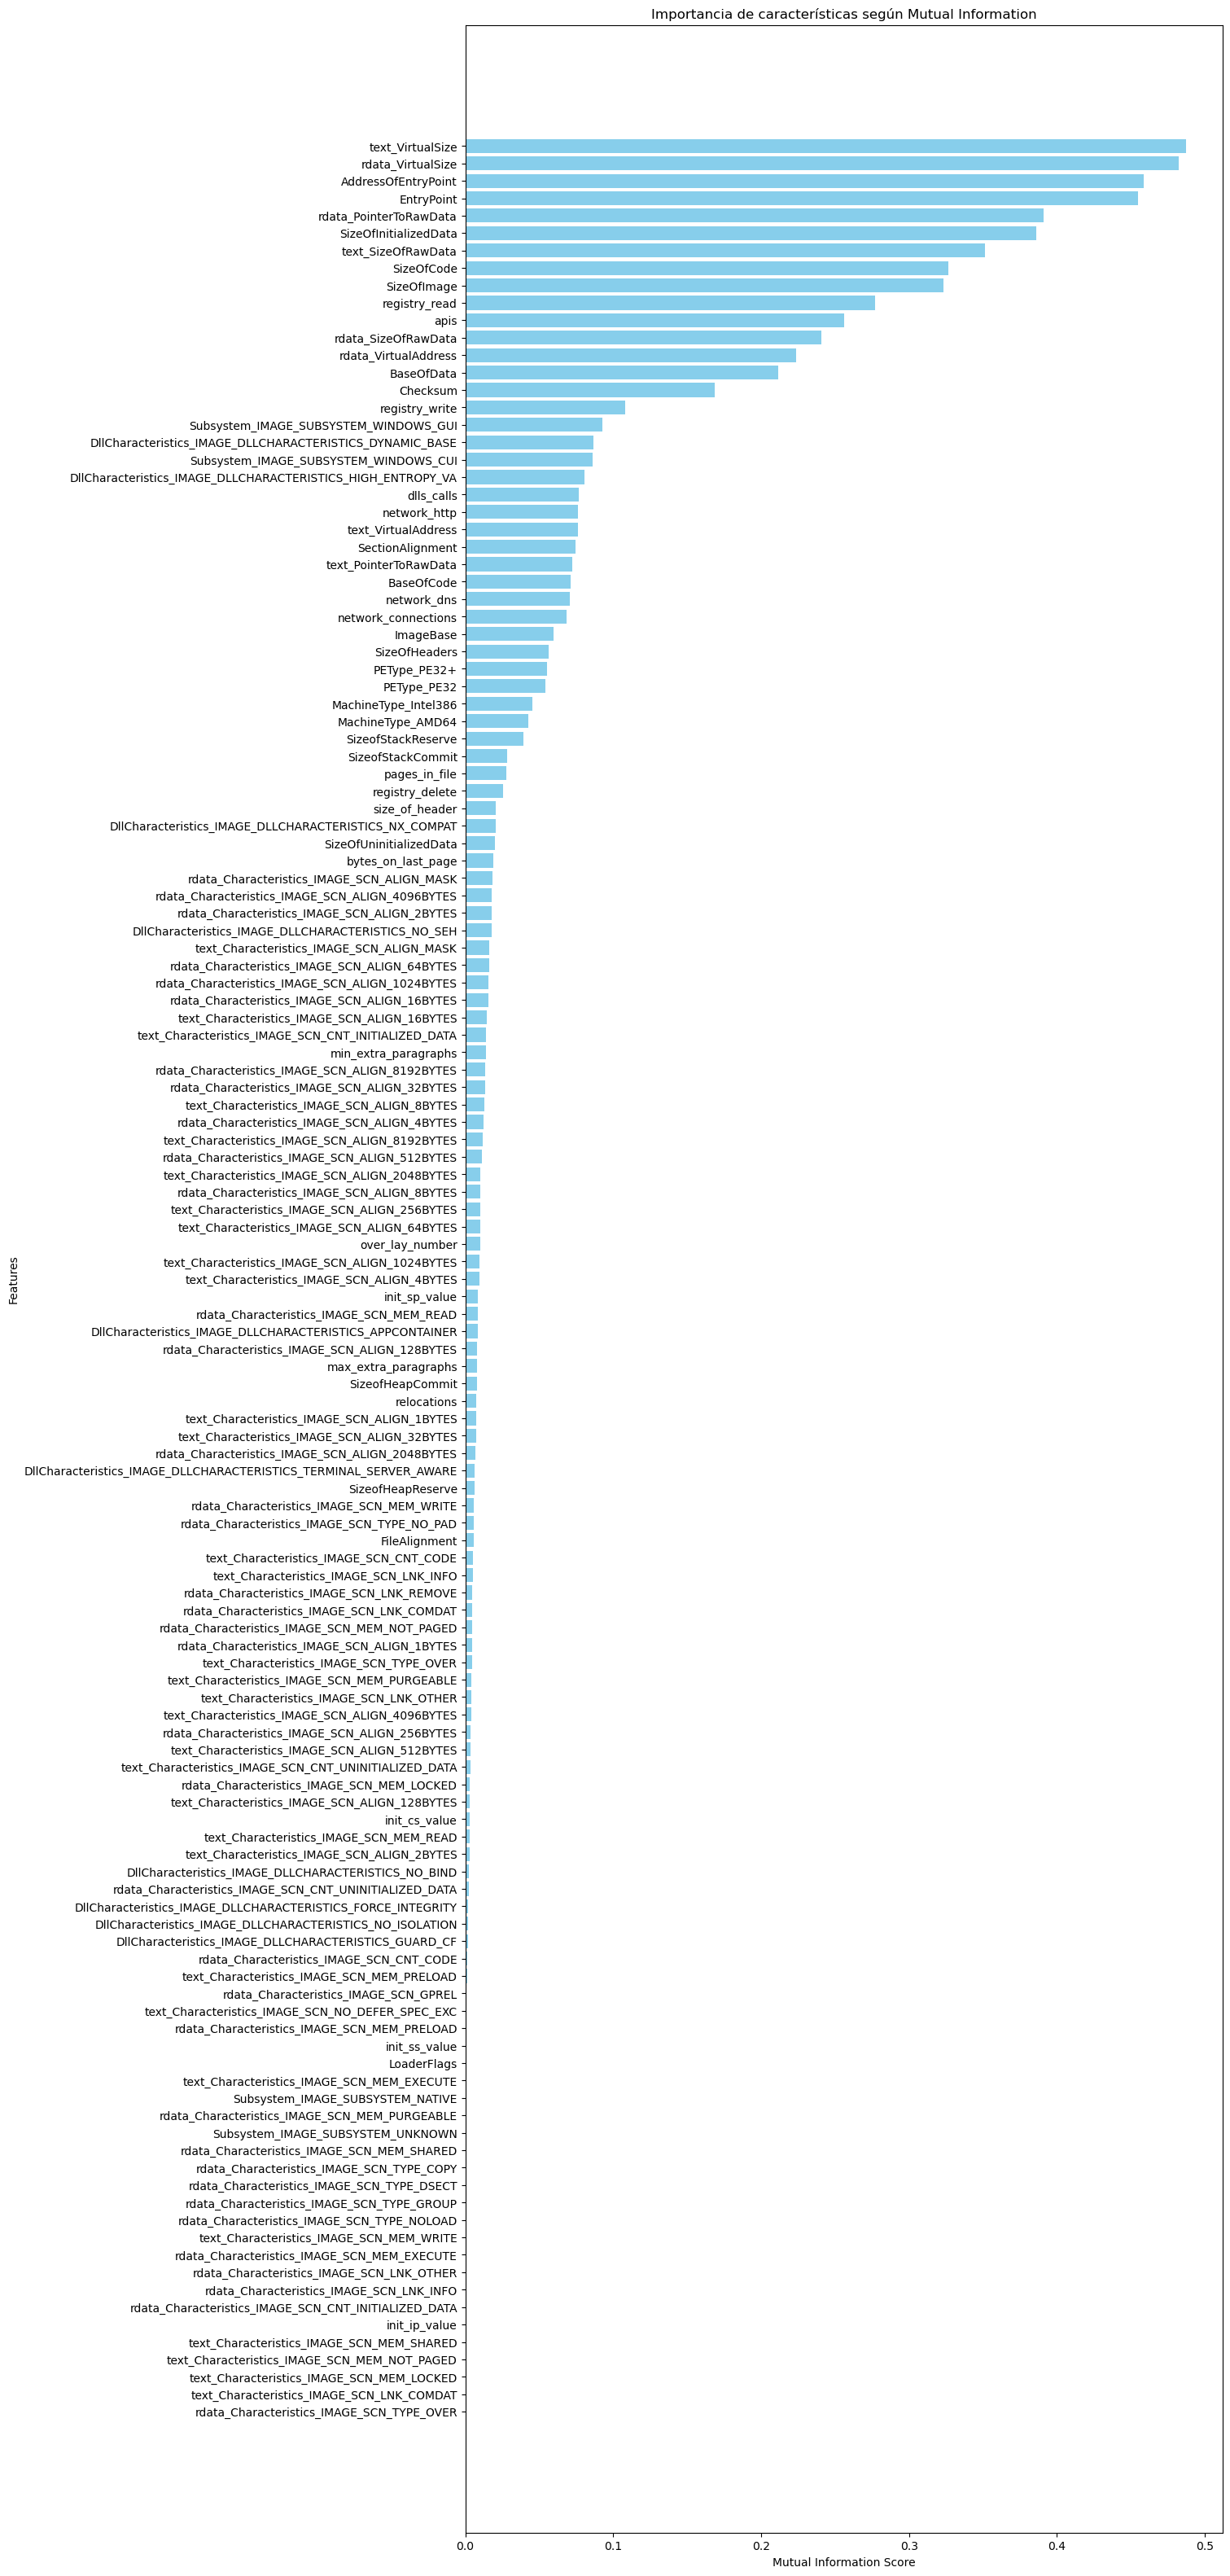

In [43]:
# === Gráfico de barras con todas las características ===
plt.figure(figsize=(12, 40))  # alto grande para que entren todas
plt.barh(df_mi["Feature"], df_mi["MI_score"], color="skyblue")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Importancia de características según Mutual Information")
plt.gca().invert_yaxis()  # para que las más altas queden arriba
plt.show()


### Chi-Cuadradotest 
Chi-cuadrado (χ²) se usa principalmente cuando las variables son categóricas o discretas (incluyendo binarias como 0/1)

In [44]:
# === 1. Detectar variables binarias (solo 0 y 1) ===
binarias = [col for col in X.columns if set(X[col].dropna().unique()).issubset({0, 1})]

# Crear nuevo DataFrame solo con variables categóricas/binarias
X_bin = X[binarias].copy().astype(int)

print(f"Variables seleccionadas para Chi²: {binarias}")

# === 2. Calcular Chi² ===
chi_scores, p_values = chi2(X_bin, y)

# === 3. DataFrame con resultados + interpretación ===
chi2_results = pd.DataFrame({
    "Feature": X_bin.columns,
    "Chi2_score": chi_scores,
    "p_value": p_values,
    "Relacion_con_clase": [
        "DEPENDIENTE (p < 0.05)" if p < 0.05 else "INDEPENDIENTE (p >= 0.05)"
        for p in p_values
    ]
}).sort_values(by="Chi2_score", ascending=False)

# === 4. Mostrar tabla ===
print("\n=== Resultados Chi² (solo variables categóricas/binarias) ===")
print(chi2_results)

# === 5. Mostrar mensajes detallados por variable ===
print("\n=== Interpretación variable por variable ===")
for feature, chi, p in zip(X_bin.columns, chi_scores, p_values):
    if p < 0.05:
        print(f"La variable '{feature}' es DEPENDIENTE de la clase (p={p:.4e}, Chi²={chi:.2f})")
    else:
        print(f"La variable '{feature}' es INDEPENDIENTE de la clase (p={p:.4e}, Chi²={chi:.2f})")


Variables seleccionadas para Chi²: ['MachineType_AMD64', 'MachineType_Intel386', 'Subsystem_IMAGE_SUBSYSTEM_NATIVE', 'Subsystem_IMAGE_SUBSYSTEM_UNKNOWN', 'Subsystem_IMAGE_SUBSYSTEM_WINDOWS_CUI', 'Subsystem_IMAGE_SUBSYSTEM_WINDOWS_GUI', 'PEType_PE32', 'PEType_PE32+', 'DllCharacteristics_IMAGE_DLLCHARACTERISTICS_APPCONTAINER', 'DllCharacteristics_IMAGE_DLLCHARACTERISTICS_DYNAMIC_BASE', 'DllCharacteristics_IMAGE_DLLCHARACTERISTICS_FORCE_INTEGRITY', 'DllCharacteristics_IMAGE_DLLCHARACTERISTICS_GUARD_CF', 'DllCharacteristics_IMAGE_DLLCHARACTERISTICS_HIGH_ENTROPY_VA', 'DllCharacteristics_IMAGE_DLLCHARACTERISTICS_NO_BIND', 'DllCharacteristics_IMAGE_DLLCHARACTERISTICS_NO_ISOLATION', 'DllCharacteristics_IMAGE_DLLCHARACTERISTICS_NO_SEH', 'DllCharacteristics_IMAGE_DLLCHARACTERISTICS_NX_COMPAT', 'DllCharacteristics_IMAGE_DLLCHARACTERISTICS_TERMINAL_SERVER_AWARE', 'text_Characteristics_IMAGE_SCN_ALIGN_1024BYTES', 'text_Characteristics_IMAGE_SCN_ALIGN_128BYTES', 'text_Characteristics_IMAGE_SCN_ALIGN

### Eliminacion de variables parte 2 

In [45]:
# Lista de variables a eliminar según Pearson, F-test, MI, Chi²
vars_a_eliminar = [
  # Redundantes o correlacionadas (Pearson)
    "AddressOfEntryPoint", "BaseOfData", "MachineType_Intel386",
    "PEType_PE32", "Subsystem_IMAGE_SUBSYSTEM_WINDOWS_CUI",

    # F-test (no dependientes)
    "relocations", "size_of_header", "init_sp_value", "init_ip_value",
    "init_cs_value", "over_lay_number", "SizeofStackReserve",
    "SizeofHeapCommit", "LoaderFlags", "Subsystem_IMAGE_SUBSYSTEM_UNKNOWN",
    "DllCharacteristics_IMAGE_DLLCHARACTERISTICS_GUARD_CF",
    "text_Characteristics_IMAGE_SCN_MEM_EXECUTE",
    "text_Characteristics_IMAGE_SCN_MEM_SHARED",
    "rdata_Characteristics_IMAGE_SCN_MEM_LOCKED",
    "rdata_Characteristics_IMAGE_SCN_MEM_READ",

    # Mutual Information (sin relevancia)
    "init_ss_value", "rdata_Characteristics_IMAGE_SCN_MEM_SHARED",
    "rdata_Characteristics_IMAGE_SCN_TYPE_OVER",
    "rdata_Characteristics_IMAGE_SCN_TYPE_COPY",
    "rdata_Characteristics_IMAGE_SCN_TYPE_DSECT",
    "rdata_Characteristics_IMAGE_SCN_TYPE_GROUP",
    "rdata_Characteristics_IMAGE_SCN_TYPE_NOLOAD",
    "rdata_Characteristics_IMAGE_SCN_TYPE_NO_PAD",
    "text_Characteristics_IMAGE_SCN_MEM_SHARED",

    # Chi² (independientes)
    "text_Characteristics_IMAGE_SCN_CNT_CODE",
    "text_Characteristics_IMAGE_SCN_LNK_COMDAT",
    "text_Characteristics_IMAGE_SCN_LNK_INFO",
    "text_Characteristics_IMAGE_SCN_LNK_OTHER",
    "rdata_Characteristics_IMAGE_SCN_LNK_COMDAT",
    "rdata_Characteristics_IMAGE_SCN_LNK_INFO",
    "rdata_Characteristics_IMAGE_SCN_LNK_OTHER",
    "rdata_Characteristics_IMAGE_SCN_LNK_REMOVE",
    "rdata_Characteristics_IMAGE_SCN_GPREL",
    "rdata_Characteristics_IMAGE_SCN_MEM_PURGEABLE",
    "rdata_Characteristics_IMAGE_SCN_MEM_PRELOAD",
    "rdata_Characteristics_IMAGE_SCN_TYPE_COPY",
    "rdata_Characteristics_IMAGE_SCN_TYPE_DSECT",
    "rdata_Characteristics_IMAGE_SCN_TYPE_GROUP",
    "rdata_Characteristics_IMAGE_SCN_TYPE_NOLOAD",
    "rdata_Characteristics_IMAGE_SCN_TYPE_NO_PAD",
    "rdata_Characteristics_IMAGE_SCN_TYPE_OVER",

    # Familias redundantes (mantén solo una representativa)
    # Eliminar todos los *_ALIGN_* excepto uno
    "text_Characteristics_IMAGE_SCN_ALIGN_1BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_2BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_4BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_8BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_16BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_32BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_64BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_128BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_256BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_512BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_1024BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_2048BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_4096BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_8192BYTES",
    "text_Characteristics_IMAGE_SCN_ALIGN_MASK",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_1BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_2BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_4BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_8BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_16BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_32BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_64BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_128BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_256BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_512BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_1024BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_2048BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_4096BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_8192BYTES",
    "rdata_Characteristics_IMAGE_SCN_ALIGN_MASK"
]
# Crear nuevo dataset filtrado
X = X.drop(columns=vars_a_eliminar, errors="ignore")

print(f"Dataset original: {X.shape[1]} variables")
print(f"Variables eliminadas: {len(vars_a_eliminar)}")
print(f"Dataset final: {X.shape[1]} variables")


Dataset original: 62 variables
Variables eliminadas: 76
Dataset final: 62 variables


### CSV

In [46]:
# === Exportar X a la carpeta final ===
ruta_salida =  r"C:\Users\Dell\TIC\Dataset-Final\dataset_finalLimpio.csv"

X.to_csv(ruta_salida, index=False, encoding="utf-8")

print(f"✅ Archivo CSV guardado correctamente en: {ruta_salida}")

✅ Archivo CSV guardado correctamente en: C:\Users\Dell\TIC\Dataset-Final\dataset_finalLimpio.csv


### Balanceo de clases

Distribución de clases:
 Category
Benign        10876
Ransomware     4762
Name: count, dtype: int64

Total de muestras en el dataset: 15638


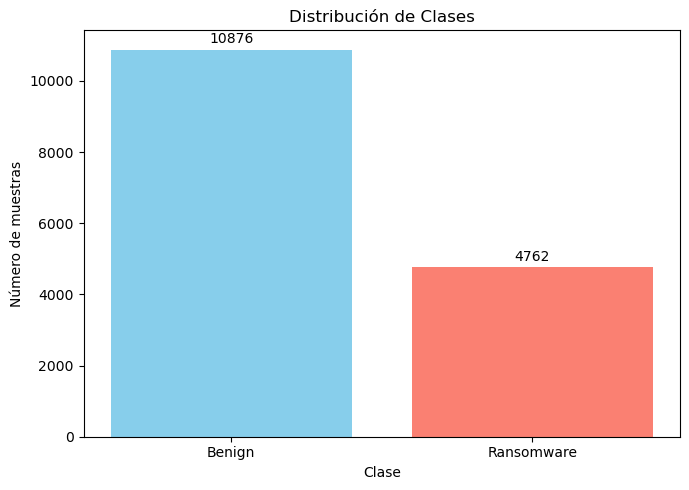

In [47]:
# Contar muestras por categoría
class_counts = data["Category"].value_counts()

# Calcular total general
total_samples = class_counts.sum()

# Imprimir valores exactos
print("Distribución de clases:\n", class_counts)
print(f"\nTotal de muestras en el dataset: {total_samples}")

# Graficar
plt.figure(figsize=(7,5))
bars = plt.bar(class_counts.index, class_counts.values, 
               color=["skyblue", "salmon", "orange"])

# Título  general
plt.title(f"Distribución de Clases")

# Etiquetas de ejes
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.xticks(rotation=0)

# Mostrar valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



### Conversion a label encoder de la variable objetivo

In [48]:
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Mostrar las clases en el orden en que fueron convertidas
print("Clases detectadas por LabelEncoder:", le.classes_)

for clase, valor in zip(le.classes_, le.transform(le.classes_)):
    print(f"{clase} → {valor}")

Clases detectadas por LabelEncoder: ['Benign' 'Ransomware']
Benign → 0
Ransomware → 1


In [49]:
print(y.head(10))     # originales
print(y_enc[:10])     # convertidos


0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
5    Benign
6    Benign
7    Benign
8    Benign
9    Benign
Name: Category, dtype: object
[0 0 0 0 0 0 0 0 0 0]


### Dividir el conjunto de train/test

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
X, y_enc, test_size = 0.20, random_state=42, stratify=y_enc)


In [51]:
# Si quieres solo tamaños:
print("\nTamaños de los conjuntos:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Tamaños de los conjuntos:
X_train: (12504, 62)
y_train: (12504,)
X_test: (3126, 62)
y_test: (3126,)


### Aplicar sobremuestreo (Oversampling) Tecnica SMOTE

In [52]:
# === 3. Aplicar SMOTE SOLO en train 
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Distribución original en train:", Counter(y_train))
print("Distribución balanceada en train:", Counter(y_train_bal))
print("Distribución en test (sin tocar):", Counter(y_test))

Distribución original en train: Counter({0: 8694, 1: 3810})
Distribución balanceada en train: Counter({1: 8694, 0: 8694})
Distribución en test (sin tocar): Counter({0: 2174, 1: 952})


### Grafico 

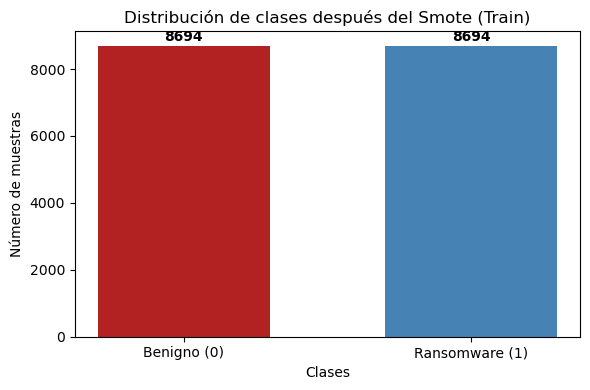

In [53]:
# Contar clases 
class_counts = Counter(y_train_bal)

# Configurar colores y etiquetas 
colores = ['steelblue', 'firebrick']  # 0=Benigno, 1=Ransomware
etiquetas = ['Benigno (0)', 'Ransomware (1)']

# === 5. Gráfico ===
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color=colores, width=0.6)
plt.title("Distribución de clases después del Smote (Train)")
plt.xlabel("Clases")
plt.ylabel("Número de muestras")
plt.xticks(ticks=[0, 1], labels=etiquetas, fontsize=10)

# Mostrar valores encima de las barras
for clase, count in class_counts.items():
    plt.text(clase, count + 50, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Entrenamiento del modelo con el algoritmo Random Forest

In [54]:
model = RandomForestClassifier(
    n_estimators=100,      # número de árboles en el bosque
    criterion='entropy',      # medida de impureza 
    max_depth=None,        # los árboles crecen hasta que todas las hojas sean puras
    random_state=42
)

model.fit(X_train_bal, y_train_bal)  # Ajusta el modelo a los datos de entrenamiento


,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluar el modelo


In [55]:
y_pred = model.predict(X_test)


### Metricas de evaluacion

In [56]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nEvaluacion del modelo Random Forest:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9856046065259118

Evaluacion del modelo Random Forest:
               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      2174
  Ransomware       0.97      0.98      0.98       952

    accuracy                           0.99      3126
   macro avg       0.98      0.98      0.98      3126
weighted avg       0.99      0.99      0.99      3126



### Matriz de confusion

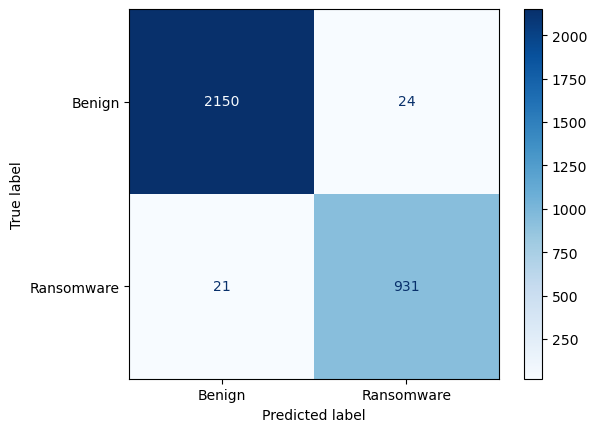

In [57]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")


### Curva Roc

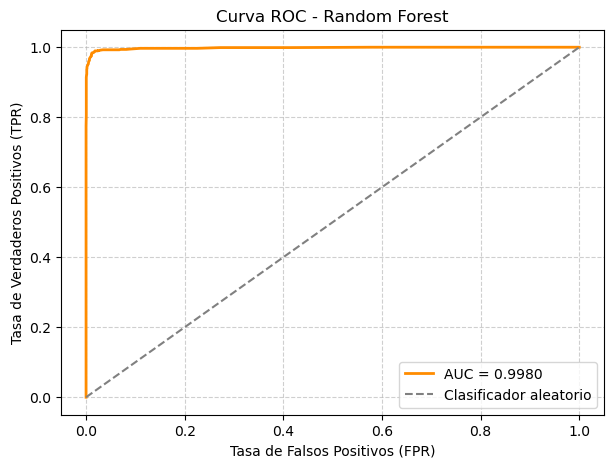

AUC (Área bajo la curva): 0.9980


In [58]:
# Obtener probabilidades de clase (solo para la clase positiva, ransomware) 
y_proba = model.predict_proba(X_test)[:, 1]

# === 2. Calcular curva ROC ===
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# === 3. Graficar curva ROC ===
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# === 4. Mostrar valor numérico del AUC ===
print(f"AUC (Área bajo la curva): {roc_auc:.4f}")


### Cross-Validation

In [59]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_bal, y_train_bal, cv=kfold, scoring="accuracy")
print("Accuracies CV:", np.round(scores, 4))
print("Promedio:", scores.mean())
print("Desviación estándar:", scores.std())

Accuracies CV: [0.9879 0.9871 0.9911 0.9911 0.9885]
Promedio: 0.9891305106439209
Desviación estándar: 0.001660319370484478


### Guardar los archivos pkl

In [60]:
# Ruta donde se guardarán los archivos
ruta_guardado = r"C:\Users\Dell\TIC\Archivos-pkl"

# Guardar el modelo y el label encoder
joblib.dump(model, os.path.join(ruta_guardado, "modelo_RF_SMOTE.pkl"))
joblib.dump(le, os.path.join(ruta_guardado, "label_encoder_RF_SMOTE.pkl"))

print(f"Archivos guardados en: {ruta_guardado}")

Archivos guardados en: C:\Users\Dell\TIC\Archivos-pkl


### Muestras de los malwares

In [61]:
# 🔹 Ruta donde se guardarán los archivos
ruta_guardado = r"C:\Users\Dell\TIC\Test"
os.makedirs(ruta_guardado, exist_ok=True)

# 🔹 Mapeo de clases (ajusta según tus etiquetas)
mapping = {0: "Benign", 1: "Ransomware"}

# 🔹 Convertir las etiquetas numéricas a texto (por seguridad)
try:
    y_names = [mapping[int(i)] for i in y_test]
except Exception:
    y_names = y_test  # si ya están en texto, las deja igual

# 🔹 Combinar X_test con las etiquetas
df_temp = X_test.copy()
df_temp["label"] = y_names

# 🔹 Crear y guardar los CSV separados por clase
for clase in ["Benign", "Ransomware"]:
    subset = df_temp[df_temp["label"] == clase].drop(columns=["label"])
    filename = f"test_{clase.lower()}.csv"
    ruta_archivo = os.path.join(ruta_guardado, filename)
    subset.to_csv(ruta_archivo, index=False, encoding="utf-8")
    print(f" {filename} creado con {len(subset)} muestras en {ruta_guardado}")

# 🔹 Mostrar conteo final de muestras por clase
print("\nConteo final de muestras por clase en X_test:")
print(df_temp["label"].value_counts())


 test_benign.csv creado con 2174 muestras en C:\Users\Dell\TIC\Test
 test_ransomware.csv creado con 952 muestras en C:\Users\Dell\TIC\Test

Conteo final de muestras por clase en X_test:
label
Benign        2174
Ransomware     952
Name: count, dtype: int64
